#  Introduction
Facebook is a widely popular social network platform created by Meta. In fact, it is among the greatest players in the digital market, with over 3.05 billion monthly active users for the third quarter of year 2023. With such a large user base, Facebook has great potential as an effective marketing/advertising channel and is chosen by many digital marketers. 

The main business question which this project aims to investigate, is the effectiveness (measured by conversion and approved conversion) of three different ad campaigns conducted by an anonymous origanization on Facebook in 2017. To conduct the analysis, I will compare the difference between the three marketing campaigns based on analysis of KPIs computed from the data and conduct A/B testing to check if the effect of each marketing campaign is truly due to causality. Additionally, regression analysis will also be included in order to understand the relationship between conversion/approved conversion and different given features.

The rest of the project will consider the following main topics:

- Dataset Overview
- Data preprocessing and Analysis
- A/B testing
- Regression 


## Dataset Overview:

The data used in this project is from an anonymous organisation’s social media ad campaign.
Overall, the data has 1143 entries and 11 columns. A brief description for each column can be given as follows:


1.) ad_id: a unique ID for each ad.

2.) xyzcampaignid: an ID associated with each ad campaign of XYZ company.

3.) fbcampaignid: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [1]:
import numpy as np
import pandas as pd

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/sales-conversion/KAG_conversion_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/sales-conversion/KAG_conversion_data.csv')

In [3]:
df

ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746              916          103916  30-34      M        15   
1      708749              916          103917  30-34      M        16   
2      708771              916          103920  30-34      M        20   
3      708815              916          103928  30-34      M        28   
4      708818              916          103928  30-34      M        28   
...       ...              ...             ...    ...    ...       ...   
1138  1314410             1178          179977  45-49      F       109   
1139  1314411             1178          179978  45-49      F       110   
1140  1314412             1178          179979  45-49      F       111   
1141  1314414             1178          179981  45-49      F       113   
1142  1314415             1178          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  
0            7350       1    1.430000                 2                    1  
1           17861       2    1.820000                 2                    0  
2             693       0    0.000000                 1                    0  
3            4259       1    1.250000                 1                    0  
4            4133       1    1.290000                 1                    1  
...           ...     ...         ...               ...                  ...  
1138      1129773     252  358.189997                13                    2  
1139       637549     120  173.880003                 3                    0  
1140       151531      28   40.289999                 2                    0  
1141       790253     135  198.710001                 8                    2  
1142       513161     114  165.609999                 5                    2  

[1143 rows x 11 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.describe()

ad_id  xyz_campaign_id  fb_campaign_id     interest  \
count  1.143000e+03      1143.000000     1143.000000  1143.000000   
mean   9.872611e+05      1067.382327   133783.989501    32.766404   
std    1.939928e+05       121.629393    20500.308622    26.952131   
min    7.087460e+05       916.000000   103916.000000     2.000000   
25%    7.776325e+05       936.000000   115716.000000    16.000000   
50%    1.121185e+06      1178.000000   144549.000000    25.000000   
75%    1.121804e+06      1178.000000   144657.500000    31.000000   
max    1.314415e+06      1178.000000   179982.000000   114.000000   

        Impressions       Clicks        Spent  Total_Conversion  \
count  1.143000e+03  1143.000000  1143.000000       1143.000000   
mean   1.867321e+05    33.390201    51.360656          2.855643   
std    3.127622e+05    56.892438    86.908418          4.483593   
min    8.700000e+01     0.000000     0.000000          0.000000   
25%    6.503500e+03     1.000000     1.480000          1.000000   
50%    5.150900e+04     8.000000    12.370000          1.000000   
75%    2.217690e+05    37.500000    60.025000          3.000000   
max    3.052003e+06   421.000000   639.949998         60.000000   

       Approved_Conversion  
count          1143.000000  
mean              0.944007  
std               1.737708  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               1.000000  
max              21.000000

## Data Preprocessing and Analysis

In [6]:
df.replace({"xyz_campaign_id" : {916:"Campaign_1",936:"Campaign_2",1178:"Campaign_3"}}, inplace=True)
df.head()

ad_id xyz_campaign_id  fb_campaign_id    age gender  interest  \
0  708746      Campaign_1          103916  30-34      M        15   
1  708749      Campaign_1          103917  30-34      M        16   
2  708771      Campaign_1          103920  30-34      M        20   
3  708815      Campaign_1          103928  30-34      M        28   
4  708818      Campaign_1          103928  30-34      M        28   

   Impressions  Clicks  Spent  Total_Conversion  Approved_Conversion  
0         7350       1   1.43                 2                    1  
1        17861       2   1.82                 2                    0  
2          693       0   0.00                 1                    0  
3         4259       1   1.25                 1                    0  
4         4133       1   1.29                 1                    1

### From now onwards,
**campaign_id = 916 is named as 'Campaign_1'**

**campaign_id = 936 is named as 'Campaign_2'** 

**campaign_id = 1178 is named as 'Campaign_3'**

In [7]:
print("The number of 0-values in Clicks (given that Conversion are non-zero):", len(df[(df["Clicks"] == 0) & (df["Total_Conversion"] != 0)]))

The number of 0-values in Clicks (given that Conversion are non-zero): 204


### It is easy to notice that some of entries are errorneous, containing 0 values in `Clicks`, while the other columns such as `Total_Conversion` have non-zero values. This is illogical because an ad cannot still gain postive conversions (customers) while no one clicks on it.
### To perform imputation for the invalid values in `Clicks`, we can use the K-Nearest Neighbors (KNN) algorithm from `sklearn`. The algorithm will attempt to predict the true value of an entry in reference to the mean of its neighbors, which partially negates the probability of generating biased values.

In [8]:
df["Clicks"].replace(0, np.nan, inplace=True)
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df.drop(columns=["gender", "age", 'xyz_campaign_id'])))

df["Clicks"] = df_imputed[4]

In [9]:
from ydata_profiling import ProfileReport

# Generate the profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Major insights gained by this report:
#### 1) The campaign_id are of three types with code 916, 936, 1178 and majority samples have campaign_id=1178. 
#### 2) The Age Group of 30-34 had seen the most amount of ad's
#### 3) The number of male and female users are nearly same(592 male and 551 female).
#### 4) Some features like clicks, impressions and spent are highly correlated.
#### 5) The distributions of features like impressions, clicks, spent, total_conversions and approved_conversions are similar.

### Below are further validation of these insights: 

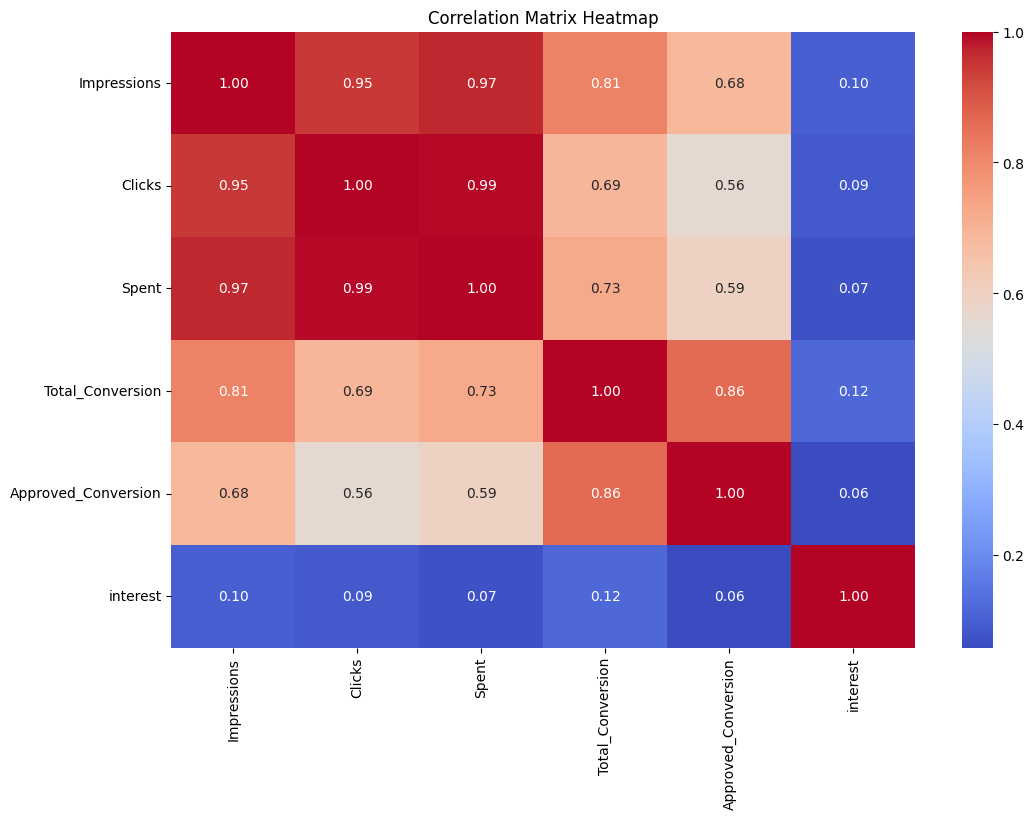

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
g=sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion","interest"]].corr(),annot=True ,fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()


### As expected, multicollinearity is present within `Impressions`, `Clicks` and `Spent`, showing almost perfect linear dependence. For other features also, the correlation coefficient is significant, ranging from 0.56 to 0.86 while only interest column has insignificant dependence. 


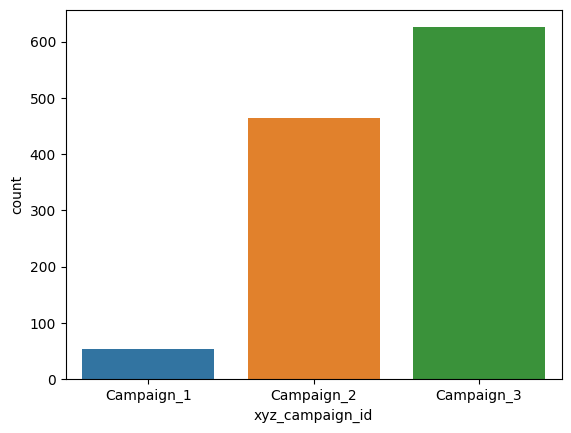

In [11]:
# count plot on single categorical variable 
sns.countplot(x ='xyz_campaign_id', data = df) 
plt.show() 

### Campaign_3 showed the most ad's

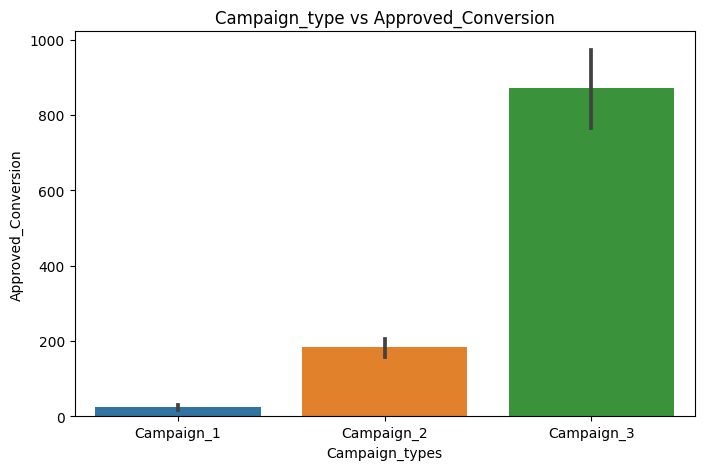

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], estimator="sum", ax=ax)

# Add labels and title
ax.set_xlabel('Campaign_types')
ax.set_ylabel('Approved_Conversion')
ax.set_title('Campaign_type vs Approved_Conversion')

plt.show()



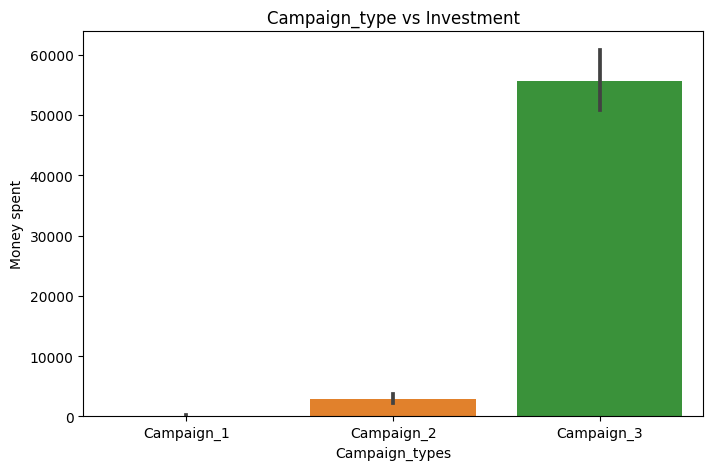

In [13]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=df["xyz_campaign_id"], y=df["Spent"], estimator="sum", ax=ax)

# Add labels and title
ax.set_xlabel('Campaign_types')
ax.set_ylabel('Money spent')
ax.set_title('Campaign_type vs Investment')

plt.show()

### Campaign_3 had a great Approved Conversion while Campaign_1 showed good Approved Conversion given that it had very less number of ad's. Also, the money spent on Campaign_3 is huge as compared to 1 and 2.

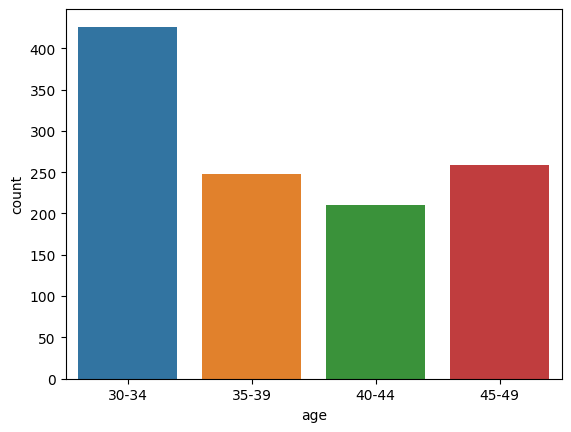

In [14]:
sns.countplot(x ='age', data = df) 
plt.show() 

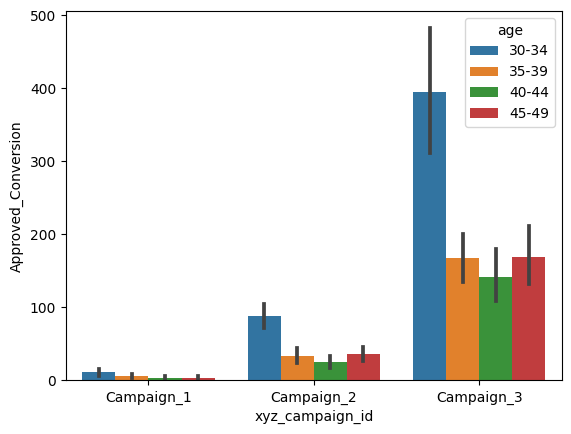

In [15]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], estimator="sum", data=df)
plt.show()

### The Age Group of 30-34 has seen the most amount of ad's

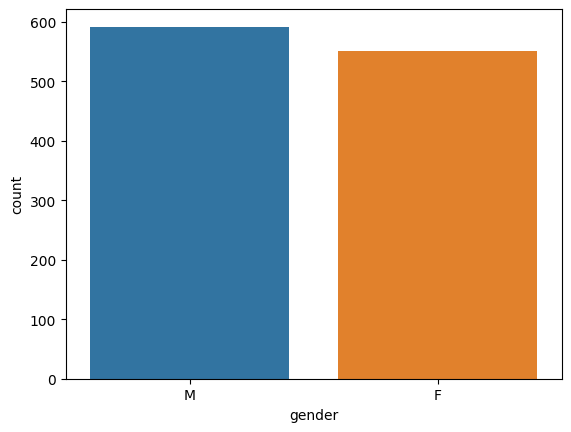

In [16]:
sns.countplot(x ='gender', data = df)  
plt.show() 

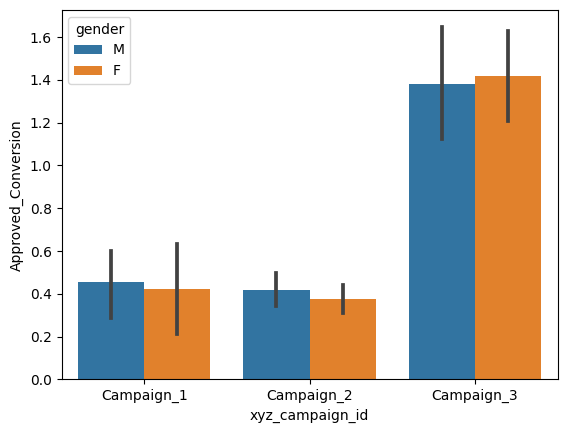

In [17]:
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=df)
plt.show()

### Both the genders i.e. Male and Female had nearly equal contribution

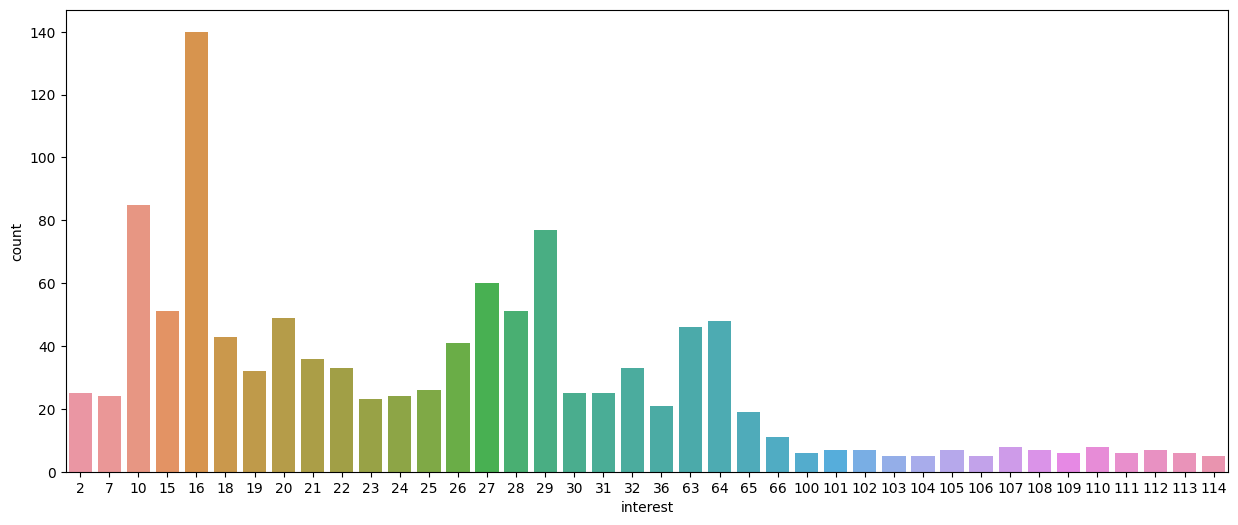

In [18]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x ='interest', data = df) 
plt.show() 

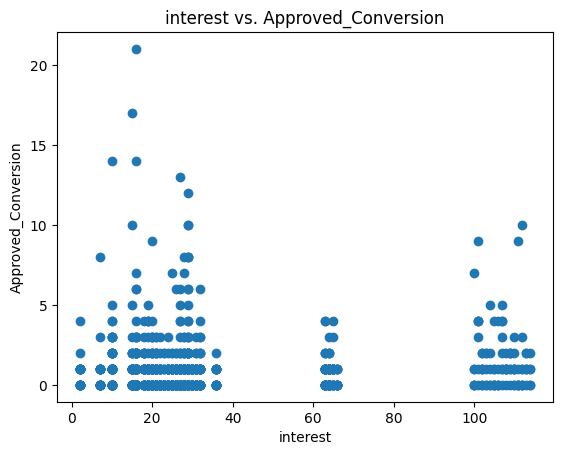

In [19]:
plt.scatter(df["interest"], df["Approved_Conversion"])
plt.title("interest vs. Approved_Conversion")
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")
plt.show()

### Here, an interesting fact is that although the count of users, with interest code greater than 100, is less, there is a rise of users who actually bought the product

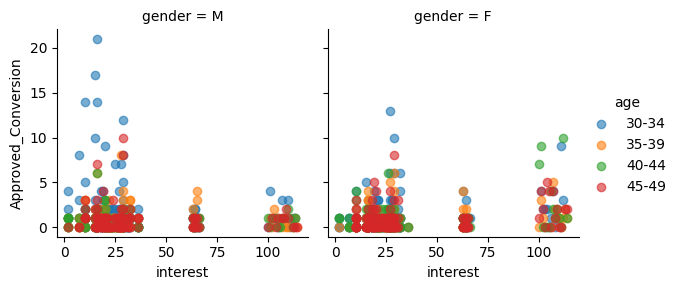

In [20]:
g = sns.FacetGrid(df, col="gender",hue = 'age')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

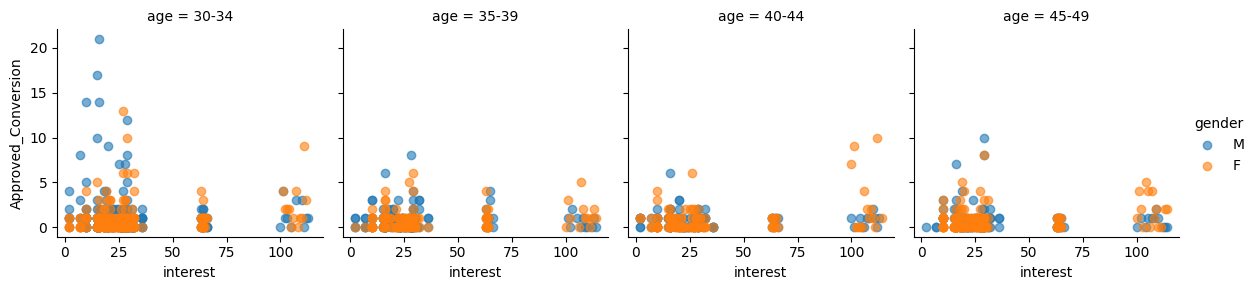

In [21]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

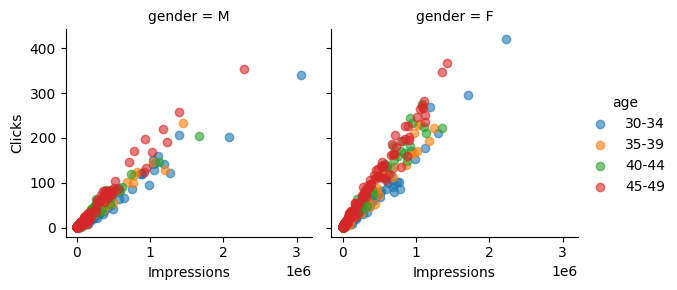

In [22]:
g = sns.FacetGrid(df,col = 'gender',hue = 'age')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.6)
g.add_legend()
plt.show()

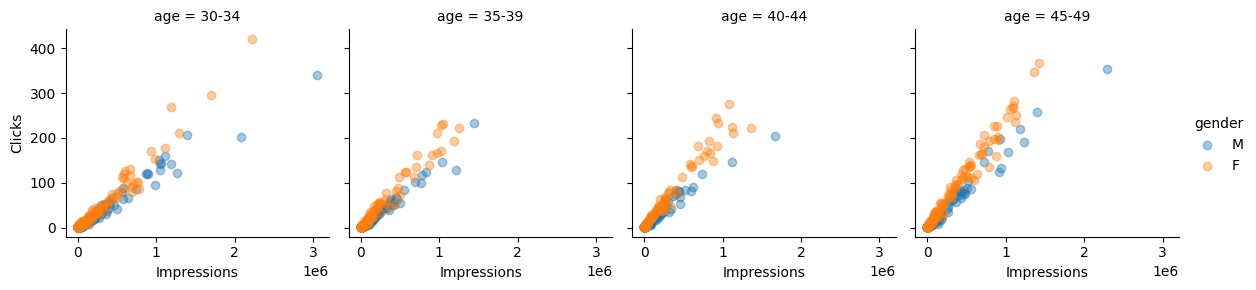

In [23]:
g = sns.FacetGrid(df,col = 'age',hue = 'gender')
g.map(plt.scatter,'Impressions', 'Clicks', alpha=0.4)
g.add_legend()
plt.show()

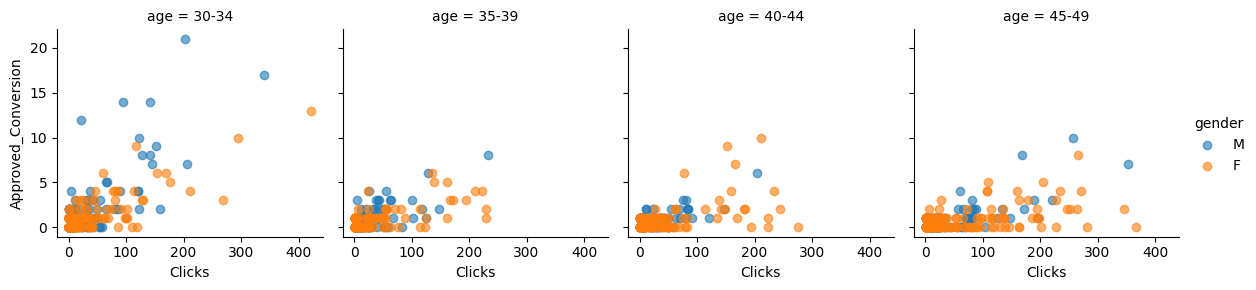

In [24]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

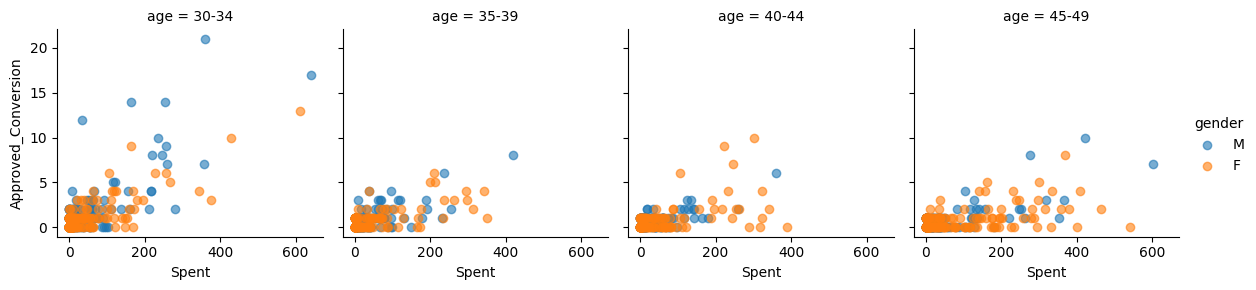

In [25]:
g = sns.FacetGrid(df, col="age",hue = 'gender')
g.map(plt.scatter, "Spent", "Approved_Conversion", alpha=0.6)
g.add_legend()
plt.show()

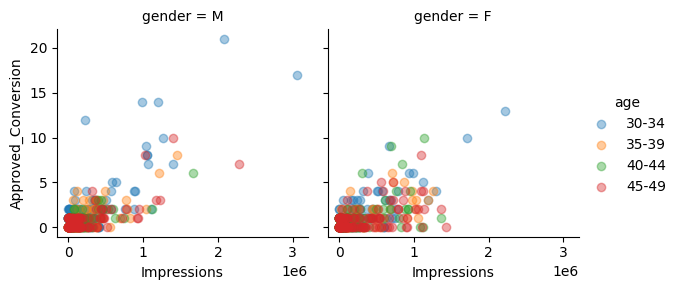

In [26]:
g = sns.FacetGrid(df, col="gender",hue= 'age')
g.map(plt.scatter, "Impressions", "Approved_Conversion", alpha=.4)
g.add_legend()
plt.show()

# SUMMARY
**Correlations:** Impressions, clicks, spent and total conversions are fairly correlated with each other.

**Age_group:** For all campaigns type, the age group of 30-34 shows most interest.

**Gender:** Both the genders shows similar interests in all three campaigns.

**Interest:** Although the count of interest after 100 is less, there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

**Product bought after clicking the ad:**
* It seems female tend to click more than male users upon seeing ads but no strict relationship can be drawn between approved conversions and clicks or spent. 
* People in age group 30-34 has more tendency to buy product after seeing the ad.

**Campaign_3:**
1. Campaign_3 has most number of ads.
2. Campaign_3 has best Approved_conversion count.


  But an important thing to note here is that, we cannot conclusively say that Campaign 3 was the most effective as it is giving the highest total conversions. This is because, it also has the largest share in the dataset and the amount spent on this campaign is way much larger than other two campaigns. 
 So, it is important to check that given an equal share of expenditure on all three campaigns, which can give more total conversions and which campaigns are utilising the expenses least effectively. 

### Using the features given in the data set, we can perform feature engineering to generate some KPIs that are important for analysis:

- **Conversion rate (CR)**. The rate of user who enquired the product after viewing the ad. This helps to measure the the percentage of users that actually become interested and bought the product being motivated by viewing the ad in a marketing campaign. 
- **Click-through rate (CTR)**. The ratio of clicks from impressions of each ad. In other words, CTR is the percentage of users that click on the ad among those who have seen the ad. This metric measures how engaging and relevant are the ads to the targetted audience. 
- **Cost per click (CPC)**. The cost of gaining a click in each ad. This metric can help evaluate whether the spending on aquiring one additional user to pay attention to the ad is cost-efficient or not. 

In [27]:
df["CR"] = df["Total_Conversion"] / df["Impressions"]
df["CTR"] = df["Clicks"] / df["Impressions"]
df["CPC"] = df["Spent"] / df["Clicks"]

In [28]:
df

ad_id xyz_campaign_id  fb_campaign_id    age gender  interest  \
0      708746      Campaign_1          103916  30-34      M        15   
1      708749      Campaign_1          103917  30-34      M        16   
2      708771      Campaign_1          103920  30-34      M        20   
3      708815      Campaign_1          103928  30-34      M        28   
4      708818      Campaign_1          103928  30-34      M        28   
...       ...             ...             ...    ...    ...       ...   
1138  1314410      Campaign_3          179977  45-49      F       109   
1139  1314411      Campaign_3          179978  45-49      F       110   
1140  1314412      Campaign_3          179979  45-49      F       111   
1141  1314414      Campaign_3          179981  45-49      F       113   
1142  1314415      Campaign_3          179982  45-49      F       114   

      Impressions  Clicks       Spent  Total_Conversion  Approved_Conversion  \
0            7350     1.0    1.430000                 2                    1   
1           17861     2.0    1.820000                 2                    0   
2             693     1.0    0.000000                 1                    0   
3            4259     1.0    1.250000                 1                    0   
4            4133     1.0    1.290000                 1                    1   
...           ...     ...         ...               ...                  ...   
1138      1129773   252.0  358.189997                13                    2   
1139       637549   120.0  173.880003                 3                    0   
1140       151531    28.0   40.289999                 2                    0   
1141       790253   135.0  198.710001                 8                    2   
1142       513161   114.0  165.609999                 5                    2   

            CR       CTR       CPC  
0     0.000272  0.000136  1.430000  
1     0.000112  0.000112  0.910000  
2     0.001443  0.001443  0.000000  
3     0.000235  0.000235  1.250000  
4     0.000242  0.000242  1.290000  
...        ...       ...       ...  
1138  0.000012  0.000223  1.421389  
1139  0.000005  0.000188  1.449000  
1140  0.000013  0.000185  1.438929  
1141  0.000010  0.000171  1.471926  
1142  0.000010  0.000222  1.452719  

[1143 rows x 14 columns]


### Let us visualize the means of the KPIs for all the ad sets belong from each of the three ad campaigns:

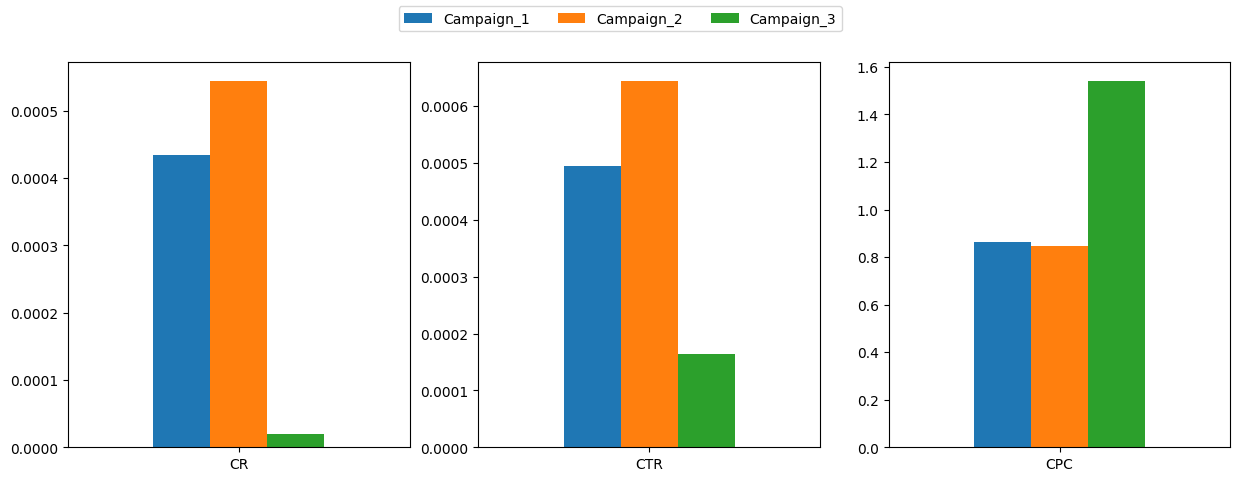

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

df[["xyz_campaign_id", "CR"]].pivot_table(columns="xyz_campaign_id", values="CR", aggfunc=np.mean).plot(kind="bar", ax=ax[0], legend=None)
ax[0].tick_params(labelrotation=0)

df[["xyz_campaign_id", "CTR"]].pivot_table(columns="xyz_campaign_id", values="CTR", aggfunc=np.mean).plot(kind="bar", ax=ax[1], legend=None)
ax[1].tick_params(labelrotation=0)

df[["xyz_campaign_id", "CPC"]].pivot_table(columns="xyz_campaign_id", values="CPC", aggfunc=np.mean).plot(kind="bar", ax=ax[2], legend=None)
ax[2].tick_params(labelrotation=0)

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.show()

Based on the charts, we can see that mean CR and CTR is the highest for campaign 2, second highest for campaign 1 and surprisingly, lowest for campaign 3. Meanwhile, mean CPC is again the highest for campaign 3. From the KPIs, campaign 3 is not at all cost-efficient with highest CPC, while generate much lower CR and CTR than its counterparts. On the other hand, campaigns 1 and 2 has proven to perform better in terms of conversion, engagement and cost-efficiency, with higher CTR, CR while remain lower in CPC. In the previous analysis, though we have observed significant greater number of clicks, impressions and conversions from campaign 3, it is now clear that seems to be explained by the higher allocated budget. 

In order to verify whether the differences between ad campaigns are statistically significant or due to chance, we can perform *`A/B testing`*. The main aim of A/B testing for three groups is to make pairwise comparisons between each pair of groups A-B, A-C and B-C, therefore asserting whether the differences between them are statisticsally significant or not. However, as we are making multiple comparison at once, the probability of making a false positive conclusions (Type I error rate) increases. This is called the *multiple comparison problem*, where multiple simultaneous inferences can lead to errorneous interpretation of results. To address this, we can use the post-hoc method Bonferroni correction to make the rejected significance threshold more strict to compensate for the number of inferences being made. The detailed steps can be given by:

- Residuals normality check of groups using `Shapiro-Wilk` test. 
  - If normal, check for variance homogenity of groups using `Levene's` test. 
    - If homogenous, perform pair-wise `T-test`.
    - If not homogenous, perform pair-wise `Welch's test`.
  - If not normal, perform pair-wise `Mann Whitney U test`.
- `Apply Boferroni` correction to conclude the test.

While using Bonferroni correction is commonly used and can be straightfoward and simple, this conservative method can result in a loss of statistical power. One can consider to switch to alternatives such as Tukey HSD test, multiple range test (MRT), etc. Nonetheless, because we are performing a fair number of comparisons, it is safe to use this method for the sake of simplicity. 

For the significance level, we can use the standard $\alpha = 0.05$ significance level. To perform Bonferroni correction, we simply lower the significance level by dividing thr current $\alpha = 0.05$ to the number of pairwise comparisons, which is equal to 3. The adjusted significance threshold is:

$$
\frac{\alpha}{3} = 0.01667
$$

### Residuals normality check:

**Null hypothesis**: The distribution of the sample are close to normal.

**Alternate hypothesis**: The distribution of the sample are not close to normal. 

For simplicity, Campaign_1 , Campaign_2, Campaign_3 are termed as group A, B, C
- For Conversion Rate(CR):

In [30]:
from scipy.stats import shapiro, levene, mannwhitneyu

_, pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CR"])
_, pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CR"])
_, pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CR"])

print("p-value for group A: ", pvalue1)
print("p-value for group B: ", pvalue2)
print("p-value for group C: ", pvalue3)

p-value for group A:  5.963321503266172e-10
p-value for group B:  4.150259129730709e-34
p-value for group C:  1.2178525550701994e-33


Because all three groups yield p-values much lower than 0.05, there is strong evidence against the Null hypothesis, and the groups' residuals are not normal.  

- For Click Through Rate(CTR): 

In [31]:
_, pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CTR"])
_, pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CTR"])
_, pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CTR"])

print("p-value for group A: ", pvalue1)
print("p-value for group B: ", pvalue2)
print("p-value for group C: ", pvalue3)

p-value for group A:  8.429466846759937e-11
p-value for group B:  5.090885117483896e-34
p-value for group C:  1.227071879839059e-05


Because all three groups yield p-values much lower than 0.05, there is strong evidence against the Null hypothesis, and the groups' residuals are not normal. 

* For Cost Per Click(CPC): 

In [32]:
_, pvalue1 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CPC"])
_, pvalue2 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CPC"])
_, pvalue3 = shapiro(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CPC"])

print("p-value for group A: ", pvalue1)
print("p-value for group B: ", pvalue2)
print("p-value for group C: ", pvalue3)

p-value for group A:  7.768616683279106e-08
p-value for group B:  2.5887991134222316e-24
p-value for group C:  1.3052494139468444e-31


Because all three groups yield p-values much lower than 0.05, there is strong evidence against the Null hypothesis, and the groups' residuals are not normal. 

Since all three groups of all three KPIs fail to satisfy the normality condition, we can use the non-parametric Mann Whitney U test. 



### Mann Whitney U test:

**Null hypothesis**: There is no difference (in terms of central tendency) between the two groups in the population

**Alternate hypothesis**: There is a difference (with respect to the central tendency) between the two groups in the population.

- For Conversion rate: 

In [33]:
_, pvalue1 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CR"], df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CR"])
_, pvalue2 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CR"], df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CR"])
_, pvalue3 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CR"], df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CR"])

print("p-value for group A-B: ", pvalue1)
print("p-value for group B-C: ", pvalue2)
print("p-value for group C-A: ", pvalue3)

p-value for group A-B:  0.4339652264015792
p-value for group B-C:  1.7577705732449588e-133
p-value for group C-A:  6.636971249222305e-31


In [34]:
_, pvalue1 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CTR"], df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CTR"])
_, pvalue2 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CTR"], df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CTR"])
_, pvalue3 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CTR"], df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CTR"])

print("p-value for group A-B: ", pvalue1)
print("p-value for group B-C: ", pvalue2)
print("p-value for group C-A: ", pvalue3)

p-value for group A-B:  0.953272496172231
p-value for group B-C:  5.773236981710117e-95
p-value for group C-A:  8.021835868757632e-20


In [35]:
_, pvalue1 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CPC"], df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CPC"])
_, pvalue2 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_2', "CPC"], df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CPC"])
_, pvalue3 = mannwhitneyu(df.loc[df["xyz_campaign_id"] == 'Campaign_3', "CPC"], df.loc[df["xyz_campaign_id"] == 'Campaign_1', "CPC"])

print("p-value for group A-B: ", pvalue1)
print("p-value for group B-C: ", pvalue2)
print("p-value for group C-A: ", pvalue3)

p-value for group A-B:  0.7970274733773802
p-value for group B-C:  3.206787240273559e-76
p-value for group C-A:  1.9701792542537628e-18


In all three cases, compared to the adjusted significance level 0.01667, we do not reject the Null hypohesis for group A-B, but reject for group B-C and group C-A. This suggests that the difference in CR, CTR and CPC between group B-C and group C-A is statistically significant and should be considered, while the difference of the KPIs between group A-B is only due to chance. 

For the company, this means that any (spending) changes to ad campaign group A and B would not result in a more significant impacts on the conversion rate, engagement (CTR) and cost per click over the other. In other words, their relative performance (in terms of the defined KPIs) are the same. On the other hand, we are able to detect significant differences between group A and B to C, which shows that with relative to their spending, the two campaigns(A and B) have performed significantly better, in terms of conversion, engagement and cost-efficincy than C, which was allocated a much higher investment. 






### Based on the results of A/B testing and campaign analysis, we can come up with some actionable approach:

- With much higher performance in terms of conversion rate and click through rate found in ad campaign  with id `916` and `936`, the company should prioritize scaling them up. This should, obviously, be taken with caution, as we cannot know precisely how the campaigns would change reaching a larger number of audiences. 
- Given a great budget, campaigns with id 1178 was able to generate large conversions and impressions. However, it's efficiency is far lower than what the other two campaigns can generate with a lower budget. The company should investigate the reason for the lack of engagement and conversions of 1178, especially given that it is exposed to a much larger audience reach. 
- The most interested audiences are from the age group `30-34`. The company should target this age group for highest user engagement and interactions. On the other hand, other existing age groups should also be investigated to understand the reason for lower interactions with ad.

## Regression analysis of total conversion 

In [36]:
from sklearn.preprocessing import LabelEncoder
df.replace({"xyz_campaign_id" : {"Campaign_1":916 ,"Campaign_2":936 ,"Campaign_3":1178}}, inplace=True)
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])

In [37]:
x=pd.DataFrame(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

In [38]:
x

ad_id  xyz_campaign_id  fb_campaign_id  age  gender  interest  \
0      708746              916          103916    0       1        15   
1      708749              916          103917    0       1        16   
2      708771              916          103920    0       1        20   
3      708815              916          103928    0       1        28   
4      708818              916          103928    0       1        28   
...       ...              ...             ...  ...     ...       ...   
1138  1314410             1178          179977    3       0       109   
1139  1314411             1178          179978    3       0       110   
1140  1314412             1178          179979    3       0       111   
1141  1314414             1178          179981    3       0       113   
1142  1314415             1178          179982    3       0       114   

      Impressions  Clicks       Spent        CR       CTR       CPC  
0            7350     1.0    1.430000  0.000272  0.000136  1.430000  
1           17861     2.0    1.820000  0.000112  0.000112  0.910000  
2             693     1.0    0.000000  0.001443  0.001443  0.000000  
3            4259     1.0    1.250000  0.000235  0.000235  1.250000  
4            4133     1.0    1.290000  0.000242  0.000242  1.290000  
...           ...     ...         ...       ...       ...       ...  
1138      1129773   252.0  358.189997  0.000012  0.000223  1.421389  
1139       637549   120.0  173.880003  0.000005  0.000188  1.449000  
1140       151531    28.0   40.289999  0.000013  0.000185  1.438929  
1141       790253   135.0  198.710001  0.000010  0.000171  1.471926  
1142       513161   114.0  165.609999  0.000010  0.000222  1.452719  

[1143 rows x 12 columns]

In [39]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [40]:
from scipy import stats

from sklearn.preprocessing import RobustScaler, QuantileTransformer, StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

def objective(trial):
    params = {
        "subsample": trial.suggest_discrete_uniform("subsample", 0.6,1,0.1),
        "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree", 0.6,1,0.1),
        "eta": trial.suggest_loguniform("eta",1e-2,0.1),
        "gamma": trial.suggest_loguniform("gamma",0.05,1),
        "max_depth": trial.suggest_categorical("max_depth",[5,7,9,11,13]),
        "min_child_weight": trial.suggest_int("min_child_weight",5,11),
        "random_state": 2023
    }
    return(return_rmse(params)) 






In [41]:
import re
def return_rmse(params):
    model = xgb.train(params , dtrain, num_boost_round = 10, evals = [(dtest, 'eval')],
          early_stopping_rounds=10,verbose_eval = 0)
    result = model.eval(dtest)
    result = float(re.search(r'[\d.]+$',result).group(0))
    print(result)
    return(result)

In [42]:
import optuna
from optuna.samplers import TPESampler

# Create a study object
study1 = optuna.create_study(direction='minimize', sampler=TPESampler())

# Run the optimization
study1.optimize(objective, n_trials=200, show_progress_bar=True)


[I 2024-08-21 12:33:06,816] A new study created in memory with name: no-name-0ccf0d0f-8473-44ff-aeeb-90ae21fd9726


  0%|          | 0/200 [00:00<?, ?it/s]

2.3196817037089543
[I 2024-08-21 12:33:06,900] Trial 0 finished with value: 2.3196817037089543 and parameters: {'subsample': 1.0, 'colsample_bytree': 1.0, 'eta': 0.07350405424369585, 'gamma': 0.8652922953261621, 'max_depth': 7, 'min_child_weight': 10}. Best is trial 0 with value: 2.3196817037089543.
3.6783134798716426
[I 2024-08-21 12:33:06,923] Trial 1 finished with value: 3.6783134798716426 and parameters: {'subsample': 0.8, 'colsample_bytree': 1.0, 'eta': 0.01924580895954151, 'gamma': 0.763983566677305, 'max_depth': 5, 'min_child_weight': 8}. Best is trial 0 with value: 2.3196817037089543.
4.015416402344977
[I 2024-08-21 12:33:06,953] Trial 2 finished with value: 4.015416402344977 and parameters: {'subsample': 0.6, 'colsample_bytree': 0.6, 'eta': 0.01049527923485772, 'gamma': 0.09713633581043905, 'max_depth': 9, 'min_child_weight': 10}. Best is trial 0 with value: 2.3196817037089543.
3.6989255902432046
[I 2024-08-21 12:33:06,975] Trial 3 finished with value: 3.6989255902432046 and p

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score
xgb_model = xgb.XGBRegressor(**(study1.best_params))

xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

acc = r2_score(y_test, y_pred_xgb)
print("MAE: ", mae_xgb)
print('R2 score: ', acc)

MAE:  0.3284633734861316
R2 score:  0.9583501637423802
